# Proyek Analisis Data: Bike Sharing Dataset
- Nama : Adi Nur Rohkhim
- Email: adinurrohkhim@gmail.com
- Id Dicoding : 323165

## Menentukan Pertanyaan Bisnis

- pertanyaan 1 = Bagaimana pengaruh musim dan cuaca terhadap jumlah pesewaan sepeda ?
- pertanyaan 2 = Benarkah hari kerja dan hari libur berpengaruh terhadap jumlah pesewaan sepeda ?

## Menyiapkan semua library yang dibuthkan

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

    - instant: index
    - dteday : Tanggal
    - season : musim (1:salju, 2:semi, 3:panas, 4:gugur)
    - yr : tahun (0: 2011, 1:2012)
    - mnth : bulan( 1 to 12)
    - hr : jam (0 to 23)
    - holiday : Hari libur , 0 = tidak libur , 1 = libur
    - weekday : Hari dalam seminggu 
    - workingday : hari kerja libur = 1, kerja masuk = 0
    - weathersit : Cuaca
            1: Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian
            2: Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut
            3: Salju Ringan, Hujan Ringan + Badai Petir + Awan berserakan, Hujan Ringan + Awan berserakan
            4: Hujan Lebat + Palet Es + Badai Petir + Kabut, Salju + Kabut
    - temp : Suhu normal dalam Celsius (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
    - atemp: Suhu dalam. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
    - hum:  Kelembapan . The values are divided to 100 (max)
    - windspeed: Kecepatan angin
    - casual: jumlah pengguna biasa 
    - registered: jumlah pengguna terdaftar
    - cnt: jumlah total sepeda sewaan termasuk sepeda kasual dan terdaftar

## Data Wrangling

### Gathering Data

In [14]:
day_df=pd.read_csv('C:/Users/adinu/idcamp2023/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [15]:
hour_df=pd.read_csv('C:/Users/adinu/idcamp2023/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [244]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [16]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [17]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [18]:
print("Jumlah data duplikasi adalah : ", day_df.duplicated().sum())

Jumlah data duplikasi adalah :  0


In [19]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [20]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [21]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [22]:
print("Jumlah data duplikasi adalah : ", hour_df.duplicated().sum())

Jumlah data duplikasi adalah :  0


### Cleaning Data

#### Tidak dilakukan Cleaning Data karena pada 2 dataset tersebut sudah baik . tidak di temukan Missing Value, Invalid value, Duplicate data, dan Inaccurate value

## Exploratory Data Analysis (EDA)

### Explore ...

In [71]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [72]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [3]:
day_df.groupby('season' ).sum().head()

,instant,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,,,,,,,,,,,,,,
1,47546,91,560,7,543,120,255,53.892306,53.741424,105.505427,38.831210,60622,410726,471348
2,56764,92,856,4,550,128,258,100.170549,95.736548,115.358493,37.445312,203522,715067,918589
3,75482,94,1446,4,570,131,244,132.786150,123.308898,119.094627,32.353864,226091,835038,1061129
4,87754,89,1904,6,528,121,263,75.277275,73.965896,119.032013,30.615035,129782,711831,841613


In [116]:
day_df.groupby(by="workingday").dteday.nunique()

workingday
0    231
1    500
Name: dteday, dtype: int64

In [73]:
day_df.groupby(['workingday']).agg({'casual' : ['sum'],
                            'registered' : ['sum'],
                            'cnt' : ['sum']
                           })

,casual,registered,cnt
,sum,sum,sum
workingday,,,
0,316732,683537,1000269
1,303285,1989125,2292410


In [124]:
day_df.groupby(by="holiday").dteday.nunique()

holiday
0    710
1     21
Name: dteday, dtype: int64

In [74]:
day_df.groupby(['holiday']).agg({'casual' : ['sum'],
                            'registered' : ['sum'],
                            'cnt' : ['sum']
                           })

,casual,registered,cnt
,sum,sum,sum
holiday,,,
0,597658,2616586,3214244
1,22359,56076,78435


In [125]:
day_df.groupby(by="weekday").dteday.nunique()

weekday
0    105
1    105
2    104
3    104
4    104
5    104
6    105
Name: dteday, dtype: int64

In [75]:
day_df.groupby(['weekday']).agg({'casual' : ['sum'],
                            'registered' : ['sum'],
                            'cnt' : ['sum']
                           })

,casual,registered,cnt
,sum,sum,sum
weekday,,,
0,140521,303506,444027
1,70784,384719,455503
2,57843,411266,469109
3,57319,415729,473048
4,61460,423935,485395
5,78238,409552,487790
6,153852,323955,477807


In [193]:
day_df.groupby(by="yr").dteday.nunique()

yr
0    365
1    366
Name: dteday, dtype: int64

In [194]:
day_df.groupby(by="season").dteday.nunique()

season
1    181
2    184
3    188
4    178
Name: dteday, dtype: int64

In [197]:
day_df.groupby(by="weathersit").dteday.()

weathersit
1    463
2    247
3     21
Name: dteday, dtype: int64

In [72]:
day_df.groupby(['weathersit']).agg({'casual' : ['sum'],
                            'registered' : ['sum'],
                            'cnt' : ['sum']
                           })

,casual,registered,cnt
,sum,sum,sum
weathersit,,,
1,446346,1811606,2257952
2,169776,827082,996858
3,3895,33974,37869


In [7]:
day_df.groupby(['season']).agg({'casual' : ['sum'],
                            'registered' : ['sum'],
                            'cnt' : ['sum']
                           })

,casual,registered,cnt
,sum,sum,sum
season,,,
1,60622,410726,471348
2,203522,715067,918589
3,226091,835038,1061129
4,129782,711831,841613


In [199]:
day_df.groupby(['yr','season']).agg({'casual' : ['min','max','sum'],
                                                 'registered' : ['min','max','sum'],
                                                 'cnt' : ['min','max','sum']
                                                    })

casual               registered                 cnt              
             min   max     sum        min   max     sum   min   max     sum
yr season                                                                  
0  1           9  1424   21425        416  2841  128575   431  3239  150000
   2         121  2355   77564        674  4414  269752   795  5805  347316
   3         118  3065   95450        889  4614  324200  1115  6043  419650
   4          50  2397   52813        570  4372  273324   627  5511  326137
1  1           9  3155   39197        432  5315  282151   441  7836  321348
   2         120  3410  125958        907  6456  445315  1027  8362  571273
   3         371  3160  130641       3195  6917  510838  4073  8714  641479
   4           2  3031   76969         20  6946  438507    22  8555  515476

## Visualization & Explanatory Analysis

### Pertanyaan 1:

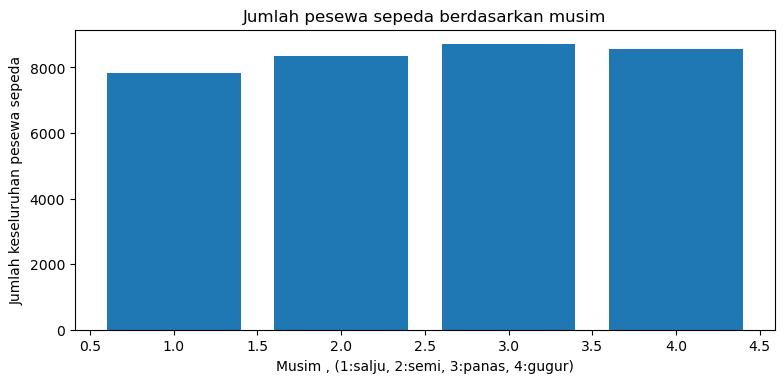

In [10]:
day_df=pd.read_csv('C:/Users/adinu/idcamp2023/day.csv')

fig = plt.figure(figsize=(7,3))
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('Musim , (1:salju, 2:semi, 3:panas, 4:gugur)')
ax.set_ylabel('Jumlah keseluruhan pesewa sepeda')
plt.title('Jumlah pesewa sepeda berdasarkan musim')

ax.bar(day_df['season'],day_df['cnt'])
plt.show()


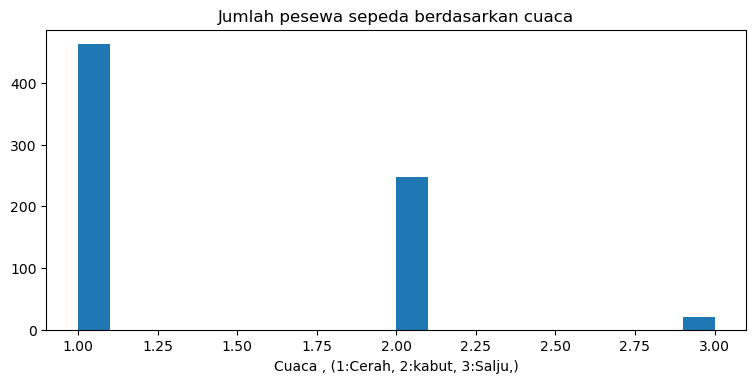

In [12]:
day_df=pd.read_csv('C:/Users/adinu/idcamp2023/day.csv')

fig = plt.figure(figsize=(7,3))
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('Cuaca , (1:Cerah, 2:kabut, 3:Salju,)')
plt.hist(day_df['weathersit'].dropna(), bins=20)
plt.title('Jumlah pesewa sepeda berdasarkan cuaca')

plt.show()

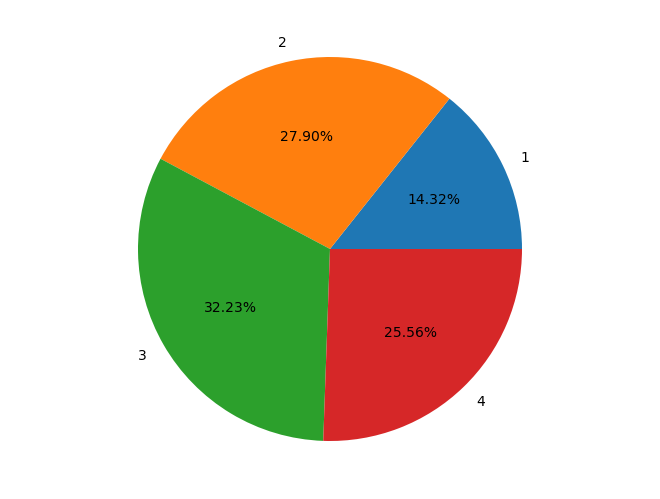

In [59]:
day_df = df.groupby('season').sum()['cnt'].reset_index()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(day_df['cnt'],labels=day_df['season'],autopct='%1.2f%%')
plt.show()

### Pertanyaan 2:

Text(0, 0.5, 'Jumlah')

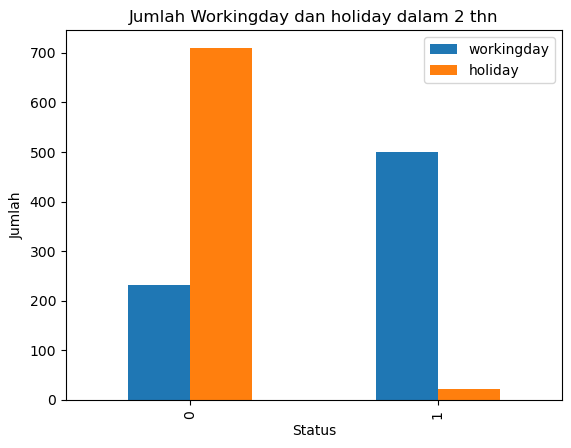

In [85]:
plotdata = pd.DataFrame({
    "workingday":[231, 500],
    "holiday":[710, 21],
    }, 
    index=["0", "1"]
)
plotdata.plot(kind="bar")
plt.title("Jumlah Workingday dan holiday dalam 2 thn")
plt.xlabel("Status")
plt.ylabel("Jumlah")

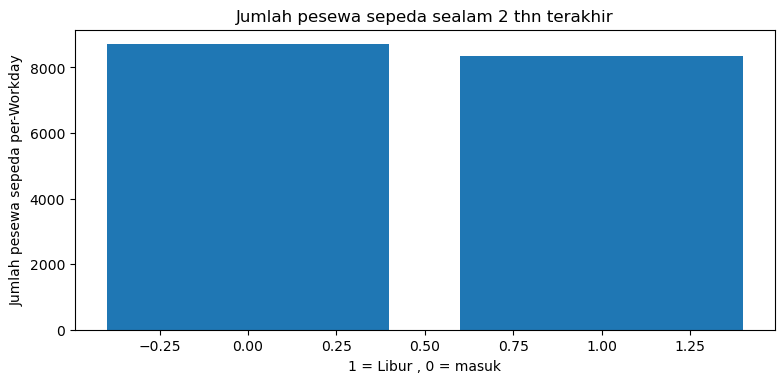

In [95]:
fig = plt.figure(figsize=(7,3))
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('1 = Libur , 0 = masuk')
ax.set_ylabel('Jumlah pesewa sepeda per-Workday')
plt.title('Jumlah pesewa sepeda sealam 2 thn terakhir')

ax.bar(day_df['workingday'],day_df['cnt'])
plt.show()


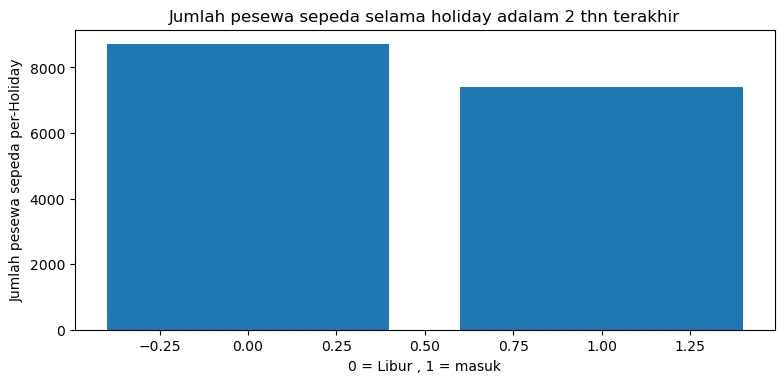

In [94]:
fig = plt.figure(figsize=(7,3))
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('0 = Libur , 1 = masuk')
ax.set_ylabel('Jumlah pesewa sepeda per-Holiday')
plt.title('Jumlah pesewa sepeda selama holiday adalam 2 thn terakhir')

ax.bar(day_df['holiday'],day_df['cnt'])
plt.show()

## Conclusion

- Conclution pertanyaan 1 
   * Jumlah pesewaan sepeda keseluruhan ( jumlah pesewa sepeda yang terdaftar maupun yg tidak terdaftar ) paling tinggi ternjadi pada musim panas yaitu sebesar 1.061.129 orang atau sekitar 32,23 % dari total keseluruhan pesewa sepeda dalam 2 tahun terahir. dan paling rendah pada musim dingin yaitu sebesar 471.348 orang. Sedangkan Untuk Kondisi cuaca Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian mendapat jumlah pesewa sepeda paling tinggi yaitu sebesar 2.257.952 orang. 
    *** Hal ini bisa di katakan Musim dan cuaca sangat berpengaruh terhadap Pesewaan jumlah sepeda   
    
   
   


- conclution pertanyaan 2 
   * Jumlah pesewaan sepeda selama weekday tidak terdapat perbedaan yang cukup signifikan. Untuk Jumlah pesewaan sepda pada liburan ( holiday ) cukup tinggi yaitu sebesar 3.214.244 orang dari pada ketika tidak libur .sedangkan untuk jumlah pesewaan sepeda per-Workday dalam kondisi libur dan mask . jumlahnya cukup signifikan dengan perbadingan jumlah ibur dibanding jumlah tidak libur sebesar 1.000.269 : 2.292.410 orang.
   
   *** Hal ini bisa di katakan Kondisi hari libur dan workday ( saat libur maupun masuk ) sangat mempengaruhi jumlah pesewaan sepeda
   
   


In [27]:
###Terima kasih

SyntaxError: invalid syntax (822568544.py, line 1)